In [65]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np
plt.style.use('ggplot')

In [41]:
#Carrega DataSetInicial:
df_train = pd.read_csv('Creditas/dataset.csv',encoding='utf-8')
#Filtra os Pré-Aprovados e retira os Duplicados:
df_pre = df_train[df_train['pre_approved']==1.0].drop_duplicates()

In [42]:
#Identificando os tipos de dados:
df_pre.dtypes
#Fornece informações detalhadas sobre tipos
df_pre.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14998 entries, 7 to 35019
Data columns (total 32 columns):
id                      14998 non-null int64
age                     14998 non-null float64
monthly_income          14998 non-null float64
collateral_value        14985 non-null float64
loan_amount             14998 non-null float64
city                    14990 non-null object
state                   14998 non-null object
collateral_debt         9691 non-null float64
verified_restriction    14935 non-null float64
dishonored_checks       14998 non-null int64
expired_debts           14998 non-null int64
banking_debts           14998 non-null int64
commercial_debts        14998 non-null int64
protests                14998 non-null int64
marital_status          402 non-null object
informed_restriction    14192 non-null float64
loan_term               0 non-null float64
monthly_payment         14248 non-null float64
informed_purpose        14415 non-null object
auto_brand           

In [43]:
#Fornece quantidade de linha e colunas
df_pre.shape

(14998, 32)

In [44]:
#Ordena os valores nulos
df_pre.isnull().sum().sort_values(ascending=False)

loan_term               14998
marital_status          14596
utm_term                10225
landing_page_product     5705
collateral_debt          5307
education_level          2886
gender                   1892
informed_restriction      806
monthly_payment           750
informed_purpose          583
channel                   565
landing_page              565
verified_restriction       63
collateral_value           13
city                        8
auto_model                  1
form_completed              0
dishonored_checks           0
age                         0
monthly_income              0
loan_amount                 0
state                       0
banking_debts               0
expired_debts               0
pre_approved                0
commercial_debts            0
protests                    0
zip_code                    0
sent_to_analysis            0
auto_brand                  0
auto_year                   0
id                          0
dtype: int64

<b>Type of Variables:</b>

<b><i>Input variable (Predictor):</i></b>  age, monthly_income, collateral_value, loan_amount, collateral_debt, verified_restriction, dishonored_checks, expired_debts, banking_debts, commercial_debts, protests, marital_status, pre_approved, sent_to_analysis, gender, education_level

<b><i>Output variable (Target):</i></b> sent_to_analysis

<h3>Pré-processamento, Limpeza, e Remoção de dado</h3>

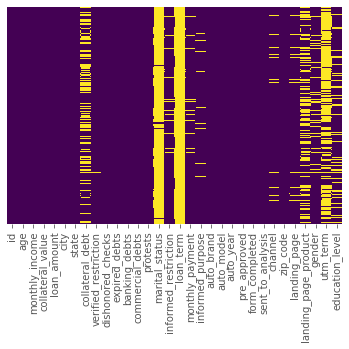

In [45]:
#Mapa de variaveis nulas
sns.heatmap(df_pre.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [46]:
    #Converter em inteiro
    df_pre['sent_to_analysis'] = df_pre.sent_to_analysis.astype(int)

In [47]:
    #Converter em inteiro
    df_pre['pre_approved'] = df_pre.pre_approved.astype(int)

In [106]:
    #Converter em inteiro
    df_pre['verified_restriction'] = df_pre.verified_restriction.astype(int)

In [48]:
#Podemos remover esses casos que não fazem sentido do nosso conjunto de dados:
columns=['id','city','state','informed_restriction','monthly_payment','informed_purpose','auto_brand','auto_model','auto_year','form_completed','loan_term','landing_page','channel','zip_code','landing_page_product','utm_term']

In [49]:
df_pre=df_pre.drop(columns,axis=1)

In [51]:
df_pre.fillna(df_pre.mean(), inplace=True)

In [52]:
#Criar as dummies para a Gender 
most_common=pd.get_dummies(df_pre.gender).sum().sort_values(ascending=False).index[0] 

def replace_most_common(x):
    if pd.isnull(x):
        return most_common
    else:
        return x

x1=df_pre.gender.map(replace_most_common)


7        female
11         male
13         male
18         male
22         male
24         male
25       female
28       female
29         male
31         male
32         male
35       female
39         male
40         male
41         male
43         male
46         male
47       female
48         male
55         male
56         male
58         male
59         male
60       female
61         male
63         male
64       female
67         male
68         male
72       female
          ...  
34981      male
34983      male
34984      male
34985      male
34986    female
34987      male
34988      male
34989      male
34990    female
34991    female
34992      male
34993      male
34994      male
34995    female
34996      male
34997      male
34998      male
35000    female
35001    female
35002      male
35004      male
35006    female
35007      male
35008    female
35011    female
35012      male
35014    female
35016      male
35017      male
35019      male
Name: gender, Length: 14

In [54]:
df_pre['gender_updated']=x1

In [55]:
df_pre.drop('gender', axis=1, inplace=True)

gender_updated  sent_to_analysis  sent_to_analysis
female          0                 0                   3554
                1                 1                    850
male            0                 0                   8175
                1                 1                   2419
Name: sent_to_analysis, dtype: int64


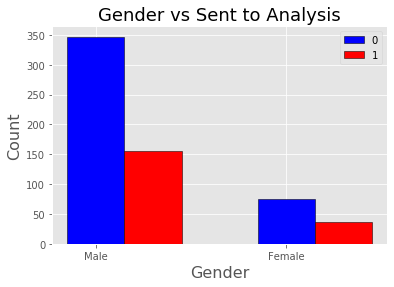

In [69]:
#Cria Visualizaçao da Relação entre Gender e sent_to_analysis:
x7=df_pre.groupby(['gender_updated','sent_to_analysis']).sent_to_analysis.value_counts()
print(x7)

gender_updated=['Male', 'Female']
sent_to_analysis=['0', '1']
pos=np.arange(len(gender_updated))
bar_width=0.30
sent_to_analysis_0=[347,75]
sent_to_analysis_1=[155,37]

plt.bar(pos,sent_to_analysis_0,bar_width,color='blue',edgecolor='black')
plt.bar(pos+bar_width,sent_to_analysis_1,bar_width,color='red',edgecolor='black')
plt.xticks(pos, gender_updated)
plt.xlabel('Gender', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Gender vs Sent to Analysis',fontsize=18)
plt.legend(sent_to_analysis,loc=1)
plt.show()

In [57]:
#Cria dummies para  Marital_Status 
most_common=pd.get_dummies(df_pre.marital_status).sum().sort_values(ascending=False).index[0] 
def replace_most_common(x):
    if pd.isnull(x):
        return most_common
    else:
        return x

x2=df_pre.marital_status.map(replace_most_common)


7        married
11       married
13       married
18       married
22       married
24       married
25       married
28       married
29       married
31       married
32       married
35       married
39       married
40       married
41       married
43       married
46       married
47       married
48       married
55       married
56       married
58       married
59       married
60       married
61       married
63       married
64       married
67       married
68       married
72       married
          ...   
34981    married
34983    married
34984    married
34985    married
34986    married
34987    married
34988    married
34989    married
34990    married
34991    married
34992    married
34993    married
34994    married
34995    married
34996    married
34997    married
34998    married
35000    married
35001    married
35002    married
35004    married
35006    married
35007    married
35008    married
35011    married
35012    married
35014    married
35016    marri

In [58]:
df_pre['marital_status_updated']=x2

In [59]:
df_pre.drop('marital_status', axis=1, inplace=True)

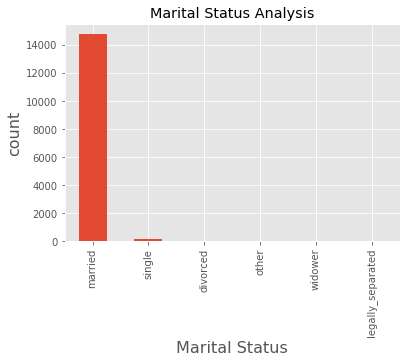

In [73]:
#Cria a Visualização da Married_Updated 
x6=df_pre.marital_status_updated 
x6.value_counts().plot(kind='bar')
plt.xlabel('Marital Status', fontsize=16)
plt.ylabel('count', fontsize=16)
plt.title("Marital Status Analysis")
plt.show()

In [60]:
most_common=pd.get_dummies(df_pre.education_level).sum().sort_values(ascending=False).index[0] #created dummies for the Gender column

def replace_most_common(x):
    if pd.isnull(x):
        return most_common
    else:
        return x

x3=df_pre.education_level.map(replace_most_common)
print(x3)

7        Ensino médio completo (antigo 2º grau, secundá...
11       Ensino médio completo (antigo 2º grau, secundá...
13                              Educação superior completa
18       Ensino médio completo (antigo 2º grau, secundá...
22       Ensino médio completo (antigo 2º grau, secundá...
24       Ensino médio completo (antigo 2º grau, secundá...
25       Ensino médio completo (antigo 2º grau, secundá...
28       Ensino médio completo (antigo 2º grau, secundá...
29                              Educação superior completa
31       Ensino médio completo (antigo 2º grau, secundá...
32       Ensino médio completo (antigo 2º grau, secundá...
35       Ensino médio completo (antigo 2º grau, secundá...
39       Ensino fundamental completo (antigo 1º grau ou...
40                              Educação superior completa
41       Ensino médio completo (antigo 2º grau, secundá...
43       Ensino médio completo (antigo 2º grau, secundá...
46                              Educação superior comple

In [61]:
df_pre['education_level_updated']=x3

In [62]:
df_pre.drop('education_level', axis=1, inplace=True)

Text(0.5, 1.0, 'Education Level Updateds')

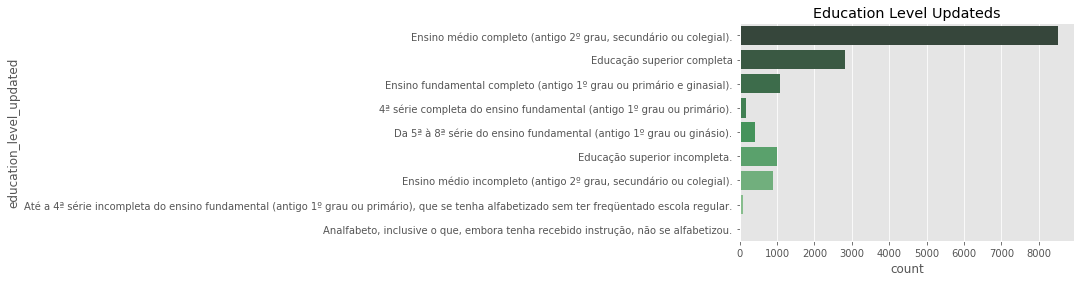

In [94]:
#Cria um Countplot com education_level_updated
sns.countplot(y='education_level_updated', data=df_pre, palette='Greens_d').set_title("Education Level Updateds")

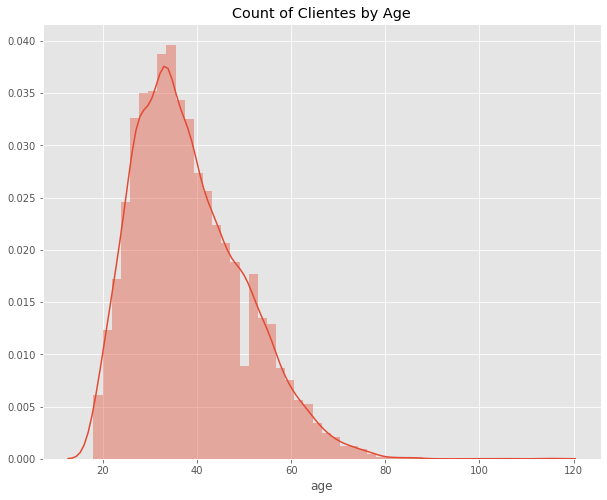

In [92]:
# Cria um distplot para visualizar as idades
plt.subplots(figsize=(10,8))
_ =sns.distplot(df_pre['age']).set_title("Count of Clientes by Age")

In [21]:
encoder= LabelEncoder()
df_pre['gender_updated']= encoder.fit_transform(df_pre['gender_updated'])


In [22]:
df_pre.gender_updated.value_counts()

1    10594
0     4404
Name: gender_updated, dtype: int64

In [23]:
encoder= LabelEncoder()
df_pre['gender_updated']= encoder.fit_transform(df_pre['gender_updated'])

In [24]:
df_pre['marital_status_updated']= encoder.fit_transform(df_pre['marital_status_updated'])

In [25]:
df_pre.education_level_updated.value_counts()

Ensino médio completo (antigo 2º grau, secundário ou colegial).                                                                                8527
Educação superior completa                                                                                                                     2820
Ensino fundamental completo (antigo 1º grau ou primário e ginasial).                                                                           1069
Educação superior incompleta.                                                                                                                  1007
Ensino médio incompleto (antigo 2º grau, secundário ou colegial).                                                                               885
Da 5ª à 8ª série do ensino fundamental (antigo 1º grau ou ginásio).                                                                             409
4ª série completa do ensino fundamental (antigo 1º grau ou primário).                                           

In [26]:
df_pre['education_level_updated']= encoder.fit_transform(df_pre['education_level_updated'])

In [27]:
df_pre.drop(['pre_approved'],axis=1,inplace=True)

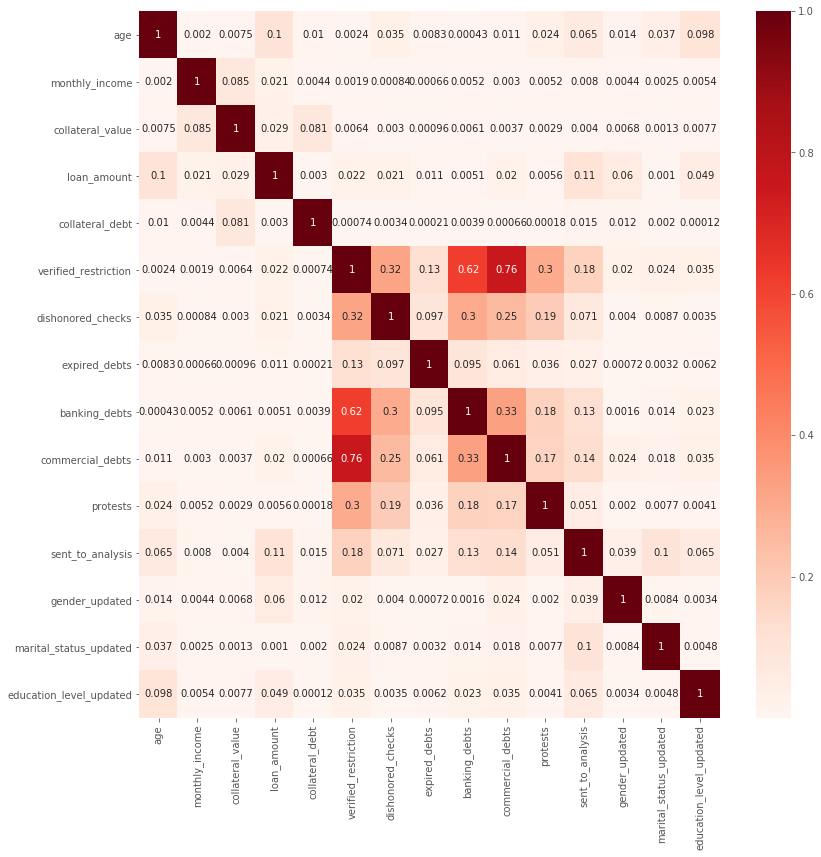

In [153]:
plt.figure(figsize=(13,13))
import math
cor = abs(df_pre.corr())
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [28]:
X=df_pre.drop(['sent_to_analysis'], axis=1)

In [29]:
y=df_pre.sent_to_analysis

In [30]:
max_accu=0
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
estimator = LogisticRegression()
for  i  in range(1,len(X.iloc[0])+1):
    selector =RFE(estimator, i, step=1)
    selector = selector.fit(X,y)
    accuracy = selector.score(X,y)
    if max_accu < accuracy:
        sel_features = selector.support_
        max_accu =accuracy
 
X_sub = X.loc[:,sel_features]

C:\Users\Michele\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Michele\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Michele\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Michele\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Michele\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

In [31]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_scaled = pd.DataFrame(sc_X.fit_transform(X), columns=X.columns)

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=0)

In [33]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
classifier.score(X_test,y_test) #classifier performance on test set

C:\Users\Michele\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7904

In [37]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [161]:
from sklearn.metrics import accuracy_score, confusion_matrix,recall_score,precision_score,classification_report

recall_score(y_test,y_pred,average='macro')

0.5300885645274395

In [162]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.79      1.00      0.88      2919
         1.0       0.88      0.06      0.12       831

    accuracy                           0.79      3750
   macro avg       0.84      0.53      0.50      3750
weighted avg       0.81      0.79      0.71      3750



In [163]:
confusion_matrix(y_test,y_pred)

array([[2912,    7],
       [ 779,   52]], dtype=int64)

In [164]:
accuracy_score(y_test,y_pred)

0.7904

In [166]:
precision_score(y_test,y_pred,average='macro')

0.8351510086375931

In [167]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=21,weights='distance',p=1)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.7773333333333333

In [169]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train,y_train)
model.score(X_test,y_test)
param_dict=({'n_neighbors':range(3,11,2),'weights':['uniform','distance'],'p':[1,2,3,4,5]})
from sklearn.model_selection import GridSearchCV
best_model=GridSearchCV(model,param_dict,cv=5)
best_model.fit(X_scaled,y)
best_model.best_params_
best_model.best_score_

0.7704360581410855

In [170]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(max_depth=25)
model2.fit(X_train,y_train)
model2.score(X_test,y_test)
param_dict_2=({'n_estimators':range(2,50)})
from sklearn.model_selection import GridSearchCV
best_model=GridSearchCV(model2,param_dict_2,cv=5)
best_model.fit(X_scaled,y)
best_model.best_params_
best_model.best_score_

C:\Users\Michele\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7837044939325243

In [171]:
from sklearn.ensemble import AdaBoostClassifier
model3 = AdaBoostClassifier(n_estimators=20)
model3.fit(X_train,y_train)
model3.score(X_test,y_test)
param_dict_3=({'n_estimators':range(2,50)})
from sklearn.model_selection import GridSearchCV
best_model=GridSearchCV(model3,param_dict_3,cv=5)
best_model.fit(X_scaled,y)
best_model.best_params_
best_model.best_score_

0.7941725563408455

In [172]:
from sklearn.svm import SVC
model_svc = SVC(kernel='linear',gamma=0.001,C=1.0)
model_svc.fit(X_train,y_train)
model_svc.score(X_test,y_test)

0.788

In [173]:
#Estimating the best model using Cross-validation
new_model=best_model.best_estimator_ #gives the best model estimation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cross_val_score(new_model, X_scaled,y,cv=5).mean()

0.7941718923726929

In [174]:
print(new_model)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=17, random_state=None)


In [ ]:
def predict (w, X, threshold = 0.5):
    